In [1]:
#load Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#load data

df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [4]:
#Checking type of data


In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
#Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
#missing values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 11 columns and 1458644 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


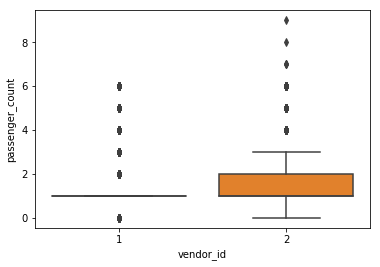

In [9]:
#Check for outliers 
sns.boxplot(x = 'vendor_id', y = 'passenger_count', data = df) 

Text(0.5, 1.0, 'boxplot of duration distribution')

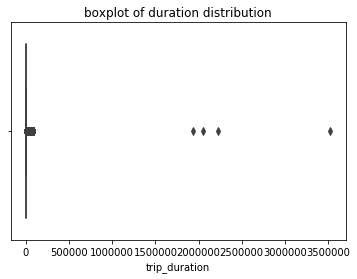

In [10]:
#Identifying Outliers
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('boxplot of duration distribution')

In [11]:
#df.boxplot(column="vendor_id");

#sns.boxplot(x ='trip_duration', y = 'vendor_id', data = df) 

In [12]:
#The total number of trips?
df.id.value_counts()

id3022294    1
id2748038    1
id0161396    1
id1005540    1
id0691337    1
            ..
id2725257    1
id0087903    1
id2798005    1
id1748554    1
id0134979    1
Name: id, Length: 1458644, dtype: int64

In [13]:
#Total number of trips
df.id.nunique()

1458644

In [14]:
#Total number of unique vendors¶

df.vendor_id.nunique()

2

In [15]:
#conda install -c conda-forge haversine


In [16]:
#new field, distance from pickup to dropoff using some python library?
from haversine import haversine

Tdistance = []
for index,row in df.iterrows():
    pickup_lat = row['pickup_latitude']
    pickup_long = row['pickup_longitude']
    drop_lat = row['dropoff_latitude']
    drop_long = row['dropoff_longitude']
    res = haversine((pickup_lat,pickup_long),(drop_lat,drop_long))
    Tdistance.append(res)
df['trip_distance'] = Tdistance    
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


In [17]:
#Descriptive stats 
df[['trip_duration','trip_distance','passenger_count']].describe()


,trip_duration,trip_distance,passenger_count
count,1.458644e+06,1.458644e+06,1.458644e+06
mean,9.594923e+02,3.440869e+00,1.664530e+00
std,5.237432e+03,4.296544e+00,1.314242e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.970000e+02,1.231838e+00,1.000000e+00
50%,6.620000e+02,2.093720e+00,1.000000e+00
75%,1.075000e+03,3.875343e+00,2.000000e+00
max,3.526282e+06,1.240910e+03,9.000000e+00


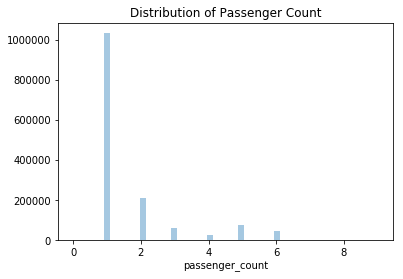

In [18]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [19]:
#Converting pickup_datetime and dropoff_datetime into proper data format
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [20]:
import datetime
#creating new field - pickup & dropoff day of the week
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [21]:
#confirming the day element
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,Saturday,Saturday


In [22]:
#Total Count of pickup day
df.pickup_day.value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [23]:
#Total Count of dropoff day
df.dropoff_day.value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

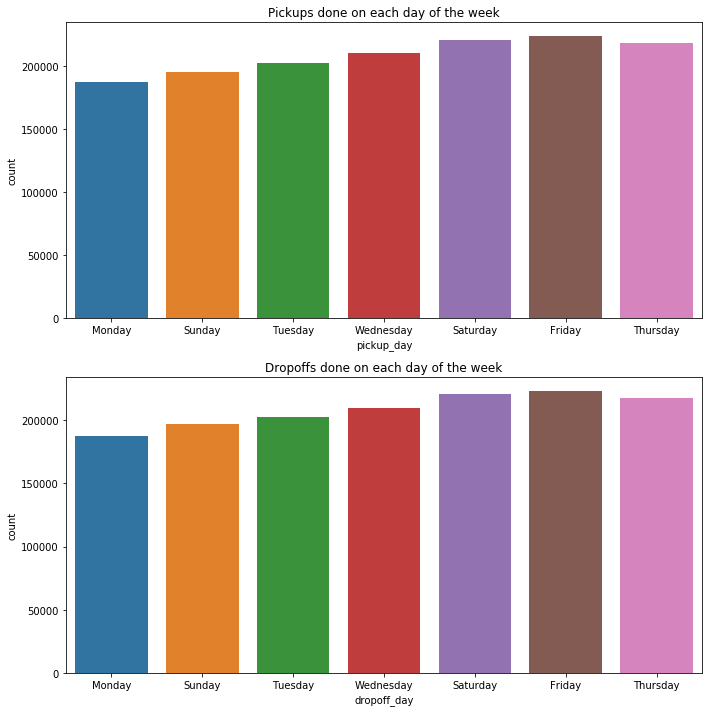

In [24]:
#Plotting the pickup and dropoff by day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Dropoffs done on each day of the week')
plt.tight_layout()

In [25]:
#Pickup and Drop Off Distribution - into early morning, morning, afternoon, evening, night and mid night. 


In [26]:
def get_time_bin(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(8, 0, 0):
        return 'early morning'
    if x>=datetime.time(8, 0, 1) and x <=datetime.time(12, 0, 0):
        return 'morning'
    elif x>=datetime.time(12, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'afternoon'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(20, 0, 0):
        return 'evening'
    elif x>=datetime.time(20, 0, 1) or x <=datetime.time(0, 0, 0):
        return 'night'
    elif x>=datetime.time(0, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'mid night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

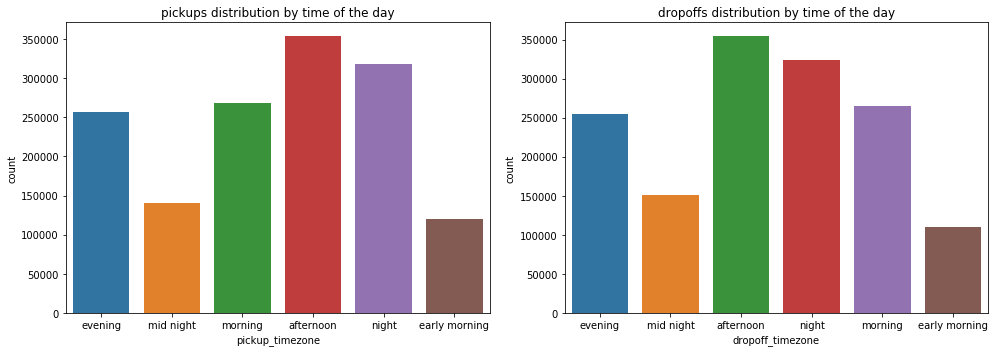

In [27]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('pickups distribution by time of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('dropoffs distribution by time of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

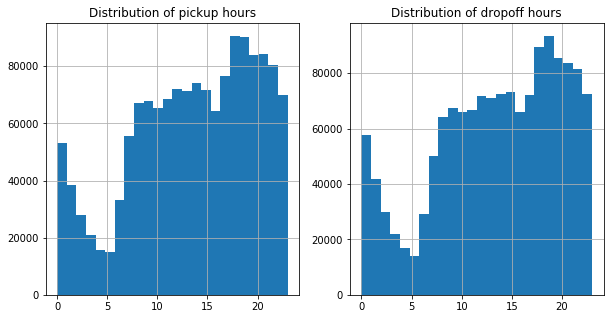

In [28]:
#Pickup and Dropoff Distribution by Hour of the day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [29]:
#Distribution of the store_and_fwd_flag column
df['store_and_fwd_flag'].value_counts()


N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Trip Duration distribution')

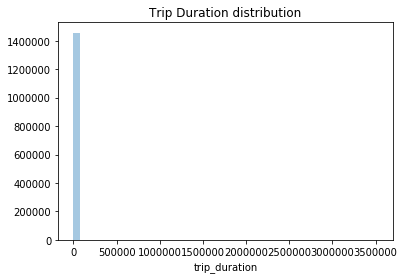

In [30]:
#Distribution of the trip duration
sns.distplot(df['trip_duration'],kde=False)
plt.title('Trip Duration distribution')


In [31]:
#conda install shapely

In [32]:
#conda install geopandas 

In [33]:
#conda install descartes


In [34]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['pickup_longitude'], df['pickup_latitude'])]
gdf = GeoDataFrame(df, geometry=geometry) 

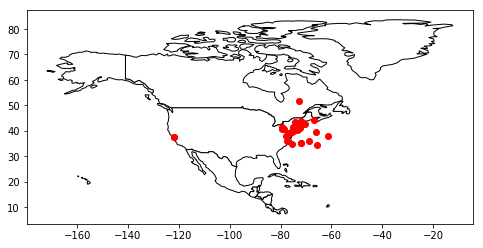

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black',figsize=(8, 8))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

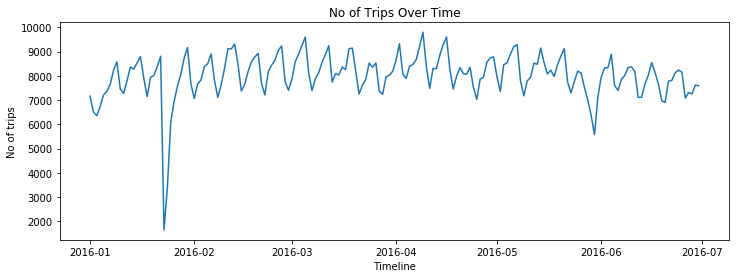

In [36]:
# No of Trips time-series by day
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'id':['nunique']})
plt.figure(figsize=(12,4))
plt.title('No of Trips Over Time')
plt.ylabel('No of trips') ; plt.xlabel('Timeline')
plt.plot(data)
pass

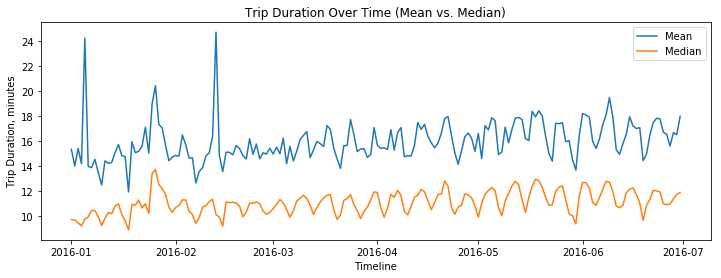

In [37]:
# trip duration time-series by day, mean vs. median
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'trip_duration':['mean', 'median']})/60
plt.figure(figsize=(12,4))
plt.title('Trip Duration Over Time (Mean vs. Median)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

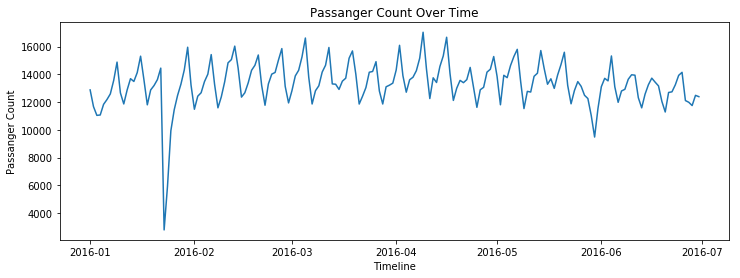

In [38]:
# Total Passangers time-series by day
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'passenger_count':['sum']})
plt.figure(figsize=(12,4))
plt.title('Passanger Count Over Time')
plt.ylabel('Passanger Count') ; plt.xlabel('Timeline')
plt.plot(data)
pass

In [40]:
#Weekly Analysis/Report

In [39]:
df['date_minus_time'] = df["pickup_day"].apply( lambda df : 
datetime.datetime(day=df.day))	
df.set_index(df["date_minus_time"],inplace=True)

AttributeError: 'str' object has no attribute 'day'

In [ ]:
df['count'].resample('D', how='sum')
df['count'].resample('W', how='sum')
df['count'].resample('M', how='sum'